### Using requests, BeautifulSoup and XHR inspection to scrape a dynamic html webpage.
### Retrieve Date and Price of a home when the house id is given. 

        Date    Price
0    01/2022  2033900
1    12/2021  1742400
2    11/2021  1714100
3    10/2021  1692700
4    09/2021  1679200
5    08/2021  1725700
6    07/2021  1739100
7    06/2021  1635500
8    05/2021  1465908
9    04/2021  1485897
10   03/2021  1587631
11   02/2021  1786102
12   01/2021  1929449
13   12/2020  1914568
14   11/2020  1904779
15   10/2020  1871097
16   09/2020  1846093
17   08/2020  1837014
18   07/2020  1801493
19   06/2020  1778358
20   05/2020  1724955
21   04/2020  1869463
22   03/2020  1870778
23   02/2020  1825668
24   01/2020  1809957
25   12/2019  1764977
26   11/2019  1745489
27   10/2019  1717633
28   09/2019  1726387
29   08/2019  1694745
30   07/2019  1720901
31   06/2019  1692024
32   05/2019  1745024
33   04/2019  1771623
34   03/2019  1753454
35   02/2019  1757683
36   01/2019  1766291
37   12/2018  1793949
38   11/2018  1850986
39   10/2018  1878404
40   09/2018  1870758
41   08/2018  1901249
42   07/2018  1964126
43   06/2018  1965366
44   05/20

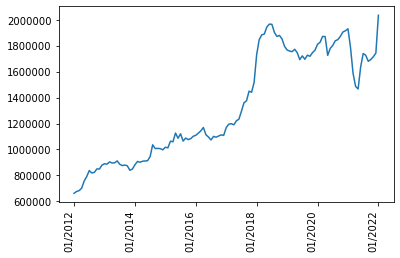

In [140]:
import requests
import json
from bs4 import BeautifulSoup
from datetime import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mticker


url = 'https://www.zillow.com/graphql/'
headers = {'authority': 'www.zillow.com', 'method':'POST', 'path': '/graphql/', 'scheme': 'https', 'accept-encoding': 'gzip, deflate, br', 'content-length': '33427', 'content-type': 'text/plain', 'accept-language': 'en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7,zh-TW;q=0.6', 'cookie': 'zgsession=1|56c64ada-dbe1-4200-b318-6487819d3b39; zguid=23|%248b19f1c2-3a3e-4a1c-a24f-5af8ef4c6aee; _ga=GA1.2.188611168.1547788252; ajs_group_id=null; abtest=3|DMEw24dTeUepwe2z4A; _pxvid=6d089920-1adf-11e9-95ad-a50a06c791c9; _gcl_au=1.1.66054169.1547788255; KruxPixel=true; DoubleClickSession=true; KruxAddition=true; ajs_anonymous_id=%228b19f1c2-3a3e-4a1c-a24f-5af8ef4c6aee%22; __gads=ID=bbcc95c50c3fa53c:T=1547788279:S=ALNI_Mbeu_PV5j2kq4KVF3GIaVDgvYVfSg; _gid=GA1.2.1634940516.1547962495; _mkto_trk=id:324-WZA-498&token:_mch-zillow.com-1547965453998-52121; ajs_user_id=%22X1-ZU10entz7frr11l_7vqv3%22; loginmemento=1|5a1cf40384976f234eb82993644461093f28004a21e9622fb39f69bcd1ed0081; userid=X|3|5c004c7406222863%7C3%7Cyer2rXR2A-EMduYPxoqonLdWJdjEQjyUB7excgD3fCg%3D; _gaexp=GAX1.2.GF-12ik4QGu49NcsNKM8Aw.17992.1; ZILLOW_SSID=1|; _px3=a5cb1c780b9f1a348e6c3655c5399958e21e71406fc27404976e587b255f5511:JtL4bDEQEMtPIWcEGtPyTgwYK+yatbQBWqjaiL2x709YsVO3PVTznieosm2R42n88u3fFYFzokcTj9Q5FAqcww==:1000:LtIpp4goD8JYbMEY8YAAnrnENWyqDbdAa9UuA79/n3VMk4g0PUbpR+zQBEQDMM5Etqdj6rRP3Sie6loDo6KwhQbLcgV/E72jZxYji9btgO4pO+zq+cl62eio+RpOgF7zaZndUVHOhohR2GvovpoXJ9gUdX8VMzjLPeOHvtsV38Y=; JSESSIONID=A54AF0DD1BFBE3CC6499C18260B1FEAB; ZILLOW_SID=1|AAAAAVVbFRIBVVsVEqtWMNHh6meLuulBcblBkrZ7SxprqYMV%2FOMrhzAhS609nVDPCqOWFg%2FzzWTOFwOgEt%2FlHwYLsyap; _pxCaptcha=eyJyIjoiMDNBRjZqRHFYNnVmZ1ZTeTNFSVVOTWZ6ck41VmNMMnZyWDhncDFXTnR2MVREaGlEcFpNT0ZiYlpYV3hmV2d1d05IdTFfdzRYT25TdVJFRmN2VWI5ZGRVbU5yLW5fQS1HU1lVT0dOM19hQ1JFOTVXRTlKZHBYT2w2MzRRdmF6bVRRN29RT0xvUWVJYlJuVnhmTmtTVmdjdjJPak1EcVBOU3FscTFaUlNJaWloX19wc0w3cGJaNlp1Z1ZJcjIzTWRENUNKbG02TXhTbWxOUTU0ZnBfLWpRdXExeVFBei1YeHc1U2pQeXM3emxfdnlPdjlraTJ6eTRuNmZneFpyUXotRm9IZmRkMTA2M0dFcFZFcG1IX1B3amoxcDVHWllmM2V5VVJFaHdlbTVnX3ZxaWJDNEJjeHZ2cmQtUkdlZTRRY3VyT0dEYXU3Y1NISUcxTSIsInYiOiI2ZDA4OTkyMC0xYWRmLTExZTktOTVhZC1hNTBhMDZjNzkxYzkiLCJ1IjoiYTg3NjU3MzAtMWM3NS0xMWU5LWFjN2YtNGQwOTRlNzU3OTZmIn0=; search=6|1550636641359%7Cregion%3DCHICAGO-Illinois%26rect%3D41.959426%252C-87.589788%252C41.912434%252C-87.743597%26zm%3D12%26zpid%3D80622737%26disp%3Dmap%26mdm%3Dauto%26type%3Dhouse%26fs%3D0%26fr%3D0%26mmm%3D0%26rs%3D1%26ah%3D0%09%01%0984654%09%09%092%090%09US_%09; AWSALB=9hTToYccbfI/I1Z7fw8b0higZJ82/SOP449V0yLLlOn3ICs+D27CBt8lMpySIROGkrIA0exh8ApAxyzye+C7O78sufyCdLZ7j+dOpGPUjgu+YUdG2uQeGp/+pY42','origin': 'https://www.zillow.com','user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}



def json_HomeValue(zpid):
    #get json query ready, zpid as input
    HomeValue = {"operationName":"HomeValueChartDataQuery","variables":{"zpid":00000},"query":"query HomeValueChartDataQuery($zpid: ID!, $metricType: HomeValueChartMetricType, $timePeriod: HomeValueChartTimePeriod, $useNewChartAPI: Boolean) {\n  property(zpid: $zpid) {\n    homeValueChartData(metricType: $metricType, timePeriod: $timePeriod, useNewChartAPI: $useNewChartAPI) {\n      points {\n        x\n        y\n      }\n      name\n    }\n  }\n}\n","clientVersion":"home-details/6.0.11.6969.master.4463e00"}
    HomeValue['variables']['zpid']=zpid
    
    return HomeValue

zpid=19620225
    

   
def timestamp_to_strdate(timestamp):
    '''  
    Converts the 13-digit timestamp to date format with month and year
    Example:
            Input: 1327996800000
            Output: 01/2012
            
    reference: https://www.codegrepper.com/code-examples/python/13+digit+timestamp+python
    '''
    dt = datetime.fromtimestamp(int(timestamp)/1000)
    return dt.strftime("%m/%Y")
def get_dict_tabledata(zpid):
    '''
    This function returns the data of Zestimate history of that property for the past 10 years
    
    Input: Zillow property ID
    Output: Dictionary with Date & Price of property as Keys and list of corresponding dates and prices as its Values
    '''
    chartData = json_HomeValue(zpid)
    table_data = {'Date':[],
                  'Price':[]}

    try:
        chart_req = requests.post(url=url, json=chartData, headers=headers) #send request to zillow server
    
        chart_out = json.loads(chart_req.text) #get the response from zillow server and load as json object
        points = chart_out['data']['property']['homeValueChartData'][0]['points']
        
        points.reverse()
        #print(points)
        for point in points: 
            str_date = timestamp_to_strdate(point['x'])
            table_data['Date'].append(str_date)
            table_data['Price'].append(point['y'])
            
        return table_data
    #parse the json object to extract scores
    #HomeValuePrices.append(chart_out['data']['property']['homeValueChartData']['points']).tostr()

    

    except Exception as e:
        print ('try again', e)
        return False

table_data = get_dict_tabledata(zpid)
pd.set_option("display.max_rows", None, "display.max_columns", None)
if table_data:
    table = pd.DataFrame.from_dict(table_data)
    #print(table)
    
    
    #table2 = table.sort_values('Date', ascending=True)
    
    print(table)
    
    table3 = table2[0:11]
    #print(table3)
    
    #plot1=plt.plot(table['Date'], table['Price'])
    #print(plot1)
    #plot1.invert_xaxis()
    #plt.xticks(rotation='vertical')
   



fig, ax1 = plt.subplots(1, 1)
#ax1.plot(table['Date'], table['Price'])
#ax1.set_title("Normal Plot")

ax1.plot(table['Date'], table['Price'])
ax1.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x))))
#ax1.set_title("Reverted axes")
ax1.invert_xaxis()
fig.autofmt_xdate()

ax1.tick_params(axis='x',rotation=90);
ax1.set_xticks( [table['Date'][0], table['Date'][24], table['Date'][48], table['Date'][72], table['Date'][96], table['Date'][120],  ]);


